In [1]:
%cd Documents/GitHub/Youshi_Wang-s-repo/group_assignment

C:\Users\Jerry\Documents\GitHub\Youshi_Wang-s-repo\group_assignment


        T1Y Index   T2Y Index   T3Y Index   T5Y Index   T7Y Index  T10Y Index  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     8.030717    8.410673    8.563587    8.808655    8.979776    9.073498   
std      3.158575    2.954431    2.820405    2.647742    2.542686    2.447525   
min      3.180000    3.840000    4.170000    4.710000    5.050000    5.330000   
25%      5.735000    6.180000    6.410000    6.695000    6.965000    7.175000   
50%      7.670000    8.000000    8.130000    8.330000    8.520000    8.610000   
75%      9.840000   10.075000   10.375000   10.525000   10.640000   10.685000   
max     16.720000   16.460000   16.220000   15.930000   15.650000   15.320000   

             CP1M        CP3M        CP6M    CP1M_T1Y    CP3M_T1Y    CP6M_T1Y  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     7.942197    7.936906    7.892780    0.981765    0.983524    0.982666   
std      3.405098    3.3293

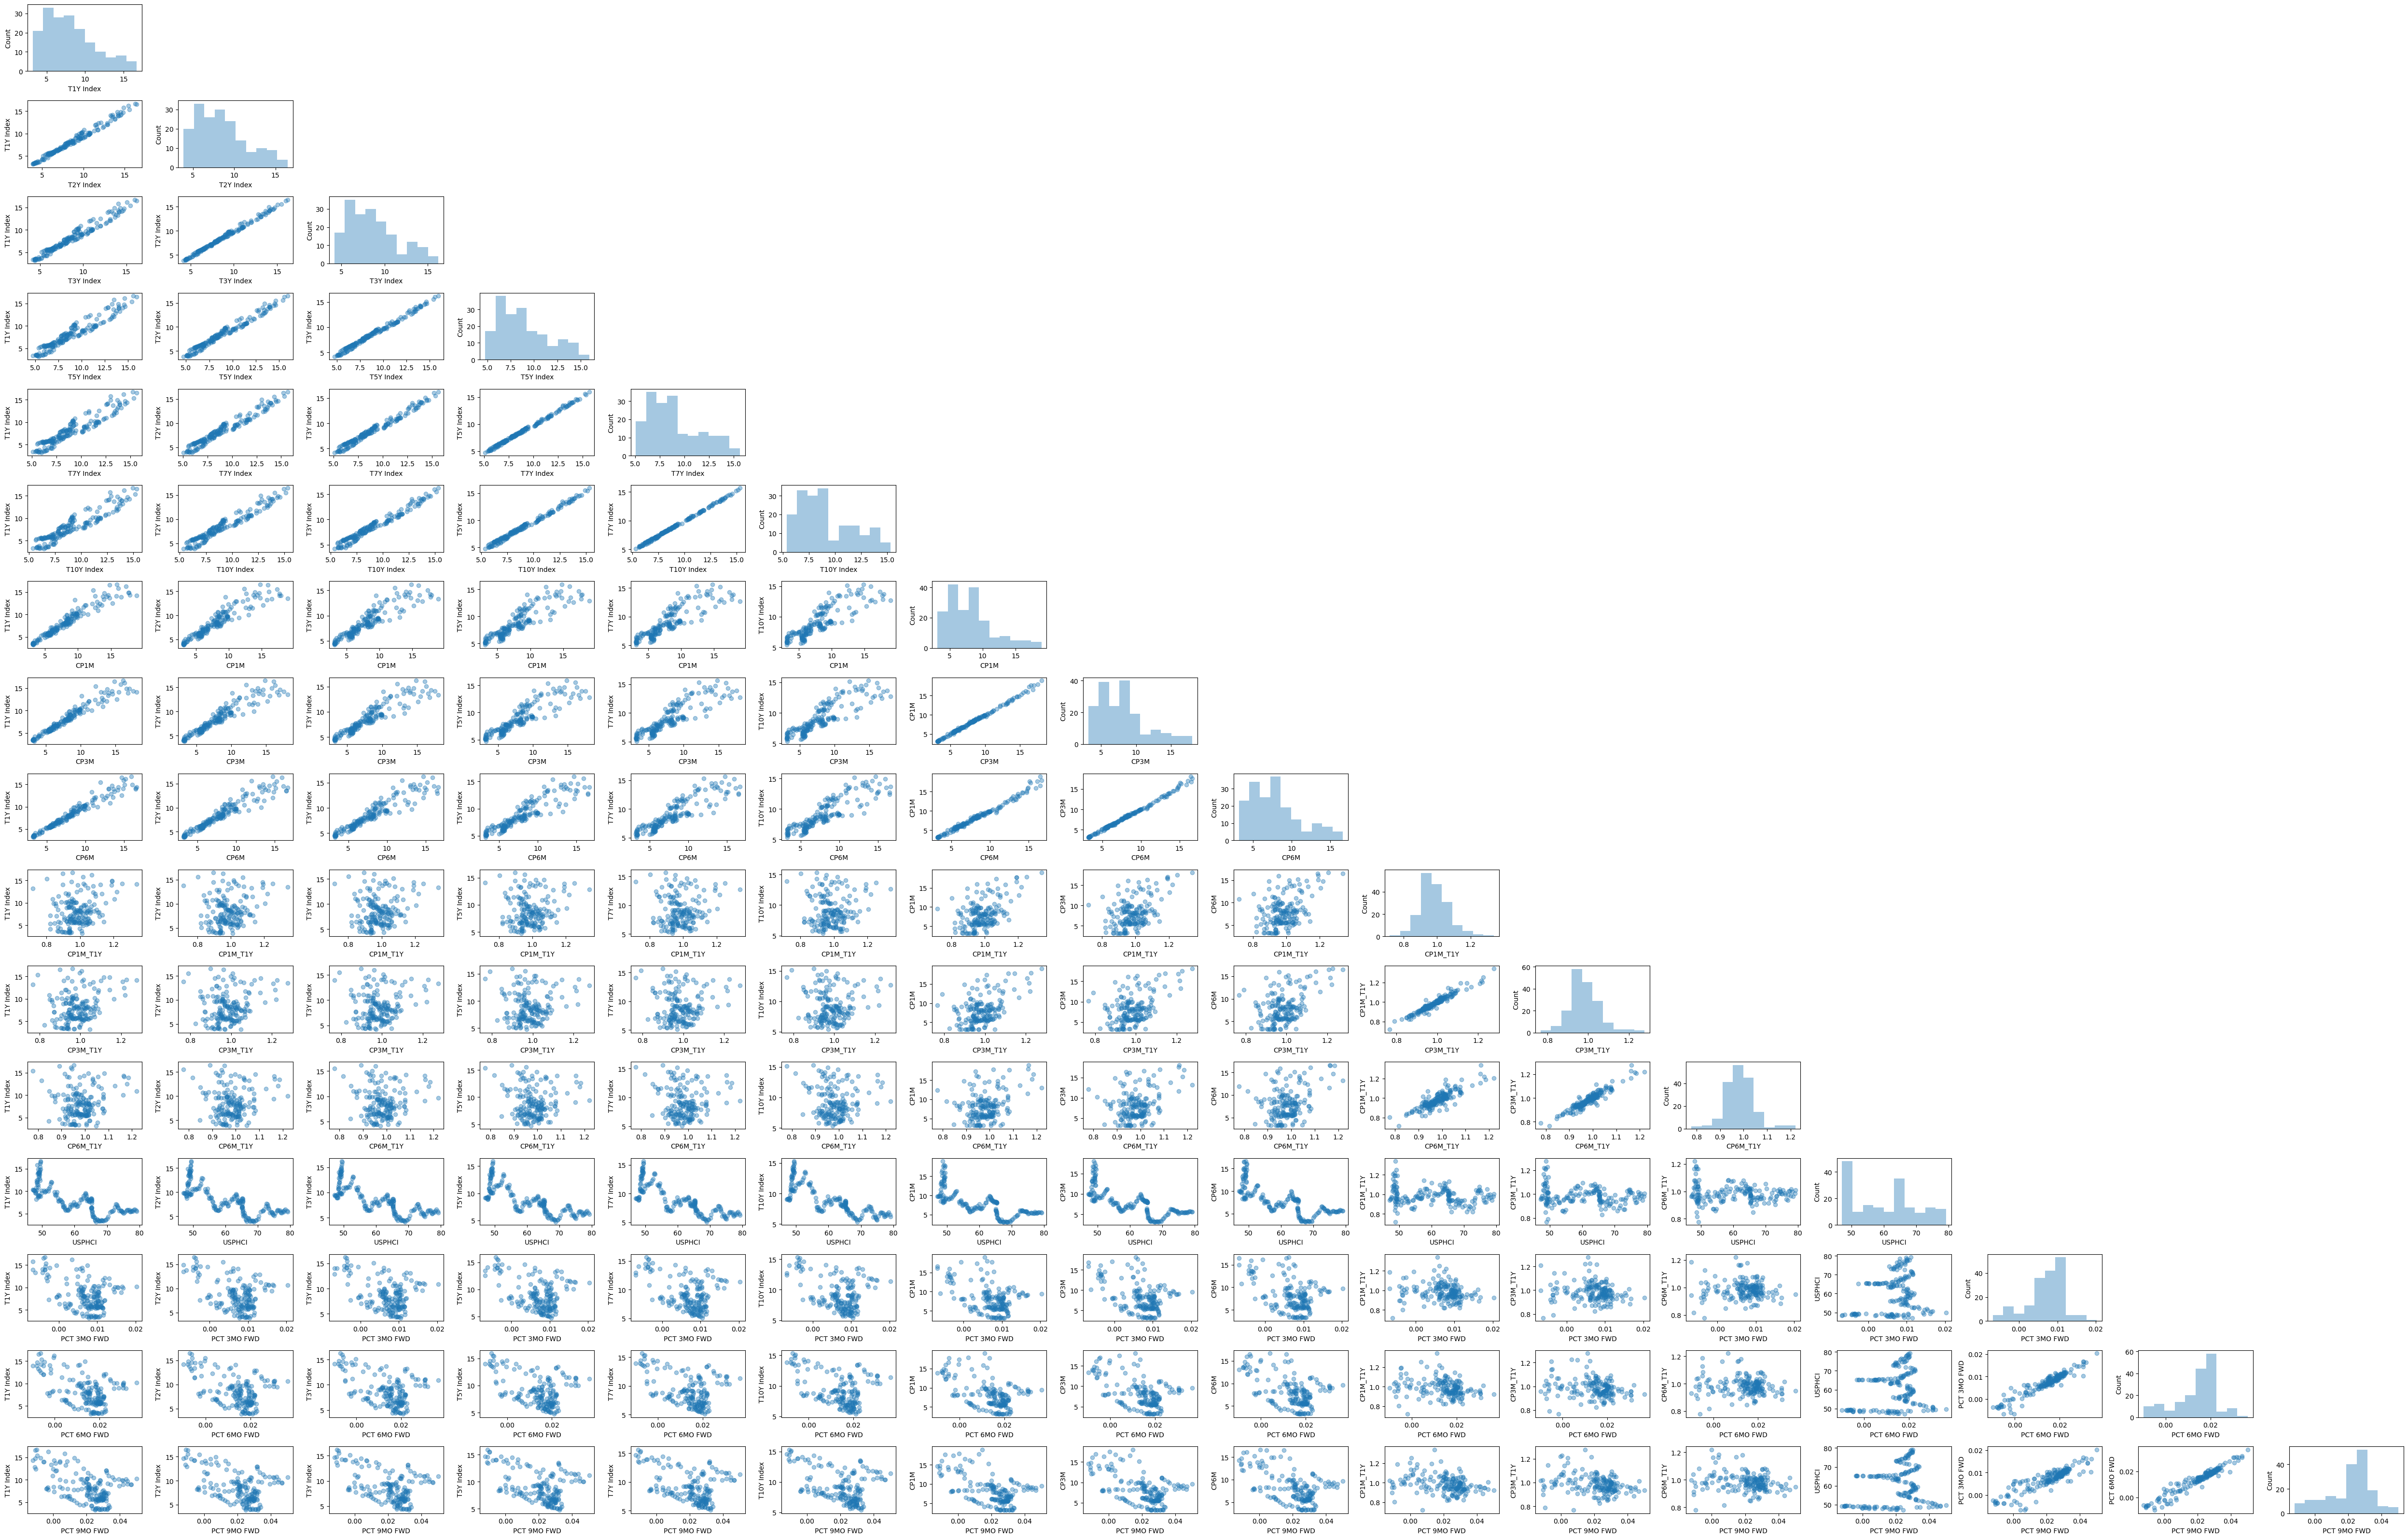

Coefficient of determination on training set: 0.3423776978763371
RMSE on training set: 0.8109391482248608
Average coefficient of determination using 10-fold crossvalidation: 0.24769766659287792
RMSE using 10-fold cross-validation: 0.8302202768918688
[-0.15636816  0.08613436 -0.46278171]
Coefficient of determination on training set: 0.35566504131683163
RMSE on training set: 0.8027047767910492
Average coefficient of determination using 10-fold crossvalidation: 0.242643465450403
RMSE using 10-fold cross-validation: 0.8323650547096019
[-0.19088562 -0.07806162 -0.03420369 -0.00484926  0.03279134  0.04817224
 -0.18816455 -0.17611771 -0.15835618 -0.12131735 -0.02962402  0.10841989
 -0.34649566]
Coefficient of determination on training set: 0.3423776978763371
RMSE on training set: 0.8109391482248608
Average coefficient of determination using 10-fold crossvalidation: 0.24769766659287792
RMSE using 10-fold cross-validation: 0.8302202768918688
[-0.15636816  0.08613436 -0.46278171]
Coefficient of 

<Figure size 1800x1200 with 0 Axes>

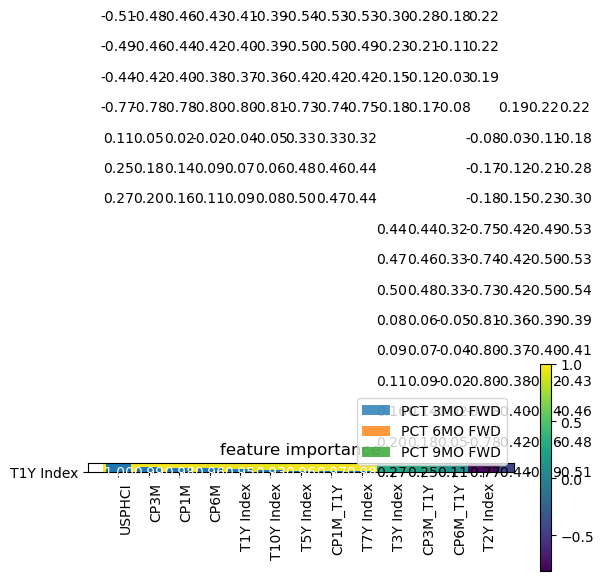

{'max_depth': 5, 'n_estimators': 100}
0.437364332019505
Mean Squared Error: 0.23145776092864545
R-squared Score: 0.7238980197106502
 1) USPHCI                         0.410120
 2) CP6M                           0.193081
 3) CP3M                           0.177690
 4) CP1M_T1Y                       0.071152
 5) CP1M                           0.066138
 6) CP3M_T1Y                       0.018114
 7) T1Y Index                      0.015014
 8) T10Y Index                     0.013685
 9) CP6M_T1Y                       0.011449
10) T3Y Index                      0.007550
11) T5Y Index                      0.005815
12) T7Y Index                      0.005245
13) T2Y Index                      0.004947


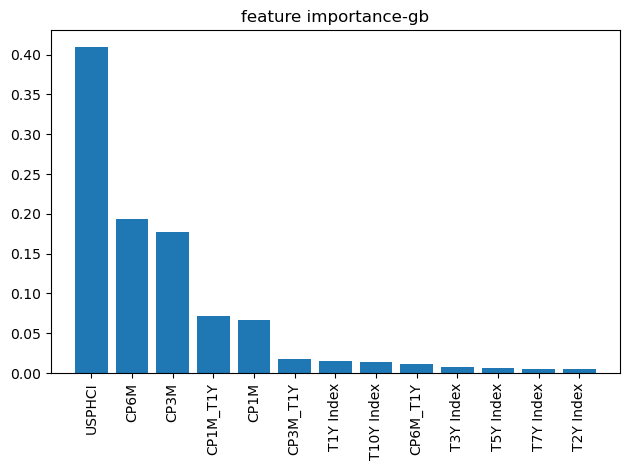

Mean Squared Error: 0.2363718972534483
R^2 score: 0.5788431090329442


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 10 13:14:58 2023

@author: Jerry
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

df=pd.read_csv('MLF_GP2_EconCycle.csv')
df=df.drop('Date',axis=1)   #drop Date column

#descriptive stats
print(df.describe())
print(df.iloc[:,13:16].describe())
print(df.kurt())
print(df.skew())    #targets are negatively skewed

#%%EDA with scatterplot matrix
from mlxtend.plotting import scatterplotmatrix
cols = df.columns
train_cols,test_cols=train_test_split(df[cols],test_size=0.2,random_state=42) #train test split
scatterplotmatrix(train_cols.values, figsize=(50, 32),
                  names=cols,alpha=0.4)
plt.tight_layout()
plt.show()  #have to enlarge the image to see the details since too many columns

#heatmap
fig = plt.figure(figsize=(18, 12))
cm = np.corrcoef(train_cols.values.T)
hm = heatmap(cm,row_names=cols,column_names=cols)

#histogram
plt.hist(df[['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD']],
         bins=30,
         stacked=(True),
         alpha=0.8,
         label=['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD'])
plt.legend()

#%% preprocessing - standardize
X=df.iloc[:, :13].values
y30=df['PCT 3MO FWD'].values
y60=df['PCT 6MO FWD'].values
y90=df['PCT 9MO FWD'].values

X_train, X_test, y_train30, y_test30 = train_test_split(X, y30, test_size=0.15, random_state=42)
X_train, X_test, y_train60, y_test60 = train_test_split(X, y60, test_size=0.15, random_state=42)
X_train, X_test, y_train90, y_test90 = train_test_split(X, y90, test_size=0.15, random_state=42)

from sklearn.preprocessing import StandardScaler
scalerX=StandardScaler().fit(X_train)
scalery30=StandardScaler().fit(y_train30.reshape(-1, 1))
X_train=scalerX.transform(X_train)
y_train30=scalery30.transform(y_train30.reshape(-1, 1))
y_train30 = y_train30.ravel()
X_test=scalerX.transform(X_test)
y_test30=scalery30.transform(y_test30.reshape(-1, 1))

scalery60=StandardScaler().fit(y_train60.reshape(-1, 1))
y_train60=scalery60.transform(y_train60.reshape(-1, 1))
y_train60 = y_train60.ravel()
y_test60=scalery60.transform(y_test60.reshape(-1, 1))

scalery90=StandardScaler().fit(y_train90.reshape(-1, 1))
y_train90=scalery90.transform(y_train90.reshape(-1, 1))
y_train90 = y_train90.ravel()
y_test90=scalery90.transform(y_test90.reshape(-1, 1))

#%% feature extraction - PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)


#%% model fitting and evaluation - continuous
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

def train_and_evaluate(clf,X_train,y_train_):
    clf.fit(X_train,y_train90)
    print("Coefficient of determination on training set:",clf.score(X_train,y_train90))
    y_pred = clf.predict(X_train)
    mse = mean_squared_error(y_train90, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE on training set:", rmse)
    cv = KFold(n_splits=10, shuffle=True, random_state=33)
    scores=cross_val_score(clf,X_train,y_train90,cv=cv)
    print("Average coefficient of determination using 10-fold crossvalidation:",np.mean(scores))
    y_pred = cross_val_predict(clf, X_train, y_train90, cv=cv)
    mse = mean_squared_error(y_train90, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE using 10-fold cross-validation:", rmse)
    
    return np.mean(scores), rmse

#linear regression using SGD
from sklearn import linear_model

#under no penalty
clf_sgd=linear_model.SGDRegressor(loss='squared_error',penalty=None,random_state=42)
train_and_evaluate(clf_sgd,X_train_pca,y_train90)
print(clf_sgd.coef_)

train_and_evaluate(clf_sgd,X_train,y_train60)
print(clf_sgd.coef_)

train_and_evaluate(clf_sgd,X_train_pca,y_train30)
print(clf_sgd.coef_)

#under l2 penalty
clf_sgd1=linear_model.SGDRegressor(loss='squared_error',penalty='l2',random_state=42)
train_and_evaluate(clf_sgd1,X_train_pca,y_train90)
print(clf_sgd1.coef_)

train_and_evaluate(clf_sgd1,X_train_pca,y_train60)
print(clf_sgd1.coef_)

train_and_evaluate(clf_sgd1,X_train_pca,y_train30)
print(clf_sgd1.coef_)

from sklearn import metrics
def measure_performance(X,y,clf,show_accuracy=True,
                        show_classification_report=True,
                        show_confusion_matrix=True,
                        show_r2_score=False,
                        show_rmse=False):
    y_pred=clf.predict(X)
    if show_accuracy:
        print('Accuracy:{0:.3f}'.format(
            metrics.accuracy_score(y,y_pred)
            ),'\n')
    if show_classification_report:
        print('Classification report')
        print(metrics.classification_matrix(y,y_pred),'\n')
    if show_confusion_matrix:
        print('Confusion matrix')
        print(metrics.confusion_matrix(y,y_pred),'\n')
    if show_r2_score:
        print('Coefficient of determination on testing set:',(
            metrics.r2_score(y,y_pred)
            ),'\n')
    if show_rmse:
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print('RMSE on testing set:', rmse, '\n')
    return metrics.r2_score(y,y_pred), rmse

measure_performance(X_test_pca,y_test90,clf_sgd,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)

measure_performance(X_test_pca,y_test90,clf_sgd1,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)

measure_performance(X_test_pca,y_test60,clf_sgd,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)

measure_performance(X_test_pca,y_test60,clf_sgd1,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)

measure_performance(X_test_pca,y_test30,clf_sgd,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)

measure_performance(X_test_pca,y_test30,clf_sgd1,
                    show_accuracy=False,show_classification_report=False,
                    show_confusion_matrix=False,show_r2_score=True,
                    show_rmse=True)


#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)    #change alpha value to test different performance
ridge.fit(X_train, y_train60)
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
#display slope and intercept of this model 
print('Slope: %.3f' % ridge.coef_[0])   
print('Intercept: %.3f' % ridge.intercept_)
#display MSE and R2 of this model
print('MSE train: %.3f, MSE test: %.3f' % (
    mean_squared_error(y_train60, y_train_pred),
    mean_squared_error(y_test60, y_test_pred)))
print('R^2 train: %.3f, R^2 test: %.3f' %
      (r2_score(y_train60, y_train_pred),
       r2_score(y_test60, y_test_pred)))

#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train90)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
#display slope and intercept of this model 
print('Slope: %.3f' % lasso.coef_[0])   
print('Intercept: %.3f' % lasso.intercept_)
#display MSE and R2 of this model
print('MSE train: %.3f, MSE test: %.3f' % (
    mean_squared_error(y_train90, y_train_pred),
    mean_squared_error(y_test90, y_test_pred)))
print('R^2 train: %.3f, R^2 test: %.3f' %
      (r2_score(y_train90, y_train_pred),
       r2_score(y_test90, y_test_pred)))

#%% Feature selection - feature importance
rf = RandomForestRegressor(n_estimators = 100, 
                           max_depth=5,
                           random_state=42)
rf.fit(X_train,y_train90)
importances=rf.feature_importances_
labels=df.columns[:-3]
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            labels[indices[f]],
                            importances[indices[f]]))

plt.title('feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim(0,0.3)
plt.tight_layout()
plt.show()  #USPHCI has the greatest importance
    
#%% Hyperparameter Tuning

rfg = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15, 20]
}
scoring = metrics.make_scorer(mean_squared_error)

grid_search = GridSearchCV(rfg, 
                           param_grid=param_grid, 
                           scoring=scoring,cv=5)

grid_search.fit(X_train, y_train30)
print(grid_search.best_params_)
print(grid_search.best_score_)

#%% Ensembling - gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

#create gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=100, 
                               learning_rate=0.1, 
                               max_depth=5, 
                               random_state=42)
#fit the gb model to training set for the 60-day horizon
gb.fit(X_train,y_train60)

#make predictions on the testing set
y_pred_grad=gb.predict(X_test)

mse_gb=mean_squared_error(y_test60,y_pred_grad)
r2_gb = r2_score(y_test60, y_pred_grad)

print("Mean Squared Error:", mse_gb)
print("R-squared Score:", r2_gb)

#check the importances of this ensembled model
importances_gb=gb.feature_importances_
labels=df.columns[:-3]
indices=np.argsort(importances_gb)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            labels[indices[f]],
                            importances_gb[indices[f]]))
plt.title('feature importance-gb')
plt.bar(range(X_train.shape[1]),
        importances_gb[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           labels[indices], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()  

#%%Ensembling - stacking

#define base models to be used in the stack
models=[
        LinearRegression(),
        RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42),
        Ridge(alpha=0.5,random_state=42),
        Lasso(alpha=0.5,random_state=42),
]

meta_model = LinearRegression()

n_folds = 10

#define array to store predictions for the meta-model
meta_features = np.zeros((X_train.shape[0], len(models)))

#perform cross-validation to create training set for meta-model
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train90[train_index], y_train90[val_index]
    for j, model in enumerate(models):
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        meta_features[val_index, j] = y_pred
        
#train meta model on meta features
meta_model.fit(meta_features,y_train90)

#make predictions on testing test
test_meta_features=np.column_stack([
    model.predict(X_test) for model in models
])
y_pred_stacking=meta_model.predict(test_meta_features)

mse_stacking=mean_squared_error(y_test90,y_pred_stacking)
cv_score_stacking=np.mean(cross_val_score(meta_model,meta_features,y_train90,cv=n_folds))
r2_stacking = r2_score(y_test60, y_pred_stacking)

print("Mean Squared Error:", mse_stacking)
print("R^2 score:", r2_stacking)











